## 1. Download StyleGan2 library and the trained model
## 2. Modify the code to run on cpus.

In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

%cd stylegan2-ada-pytorch
!sed -n '82p' generate.py 
!sed -ie '82s/.*/    device = torch.device("cpu")/' generate.py
!sed -n '82p' generate.py

!sed -n '119p' generate.py
!sed -ie '119s/.*/        img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode, force_fp32=True)/' generate.py
!sed -n '119p' generate.py

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 1.18 MiB/s, done.
Resolving deltas: 100% (55/55), done.
--2021-08-01 16:44:47--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 54.192.175.69, 54.192.175.89, 54.192.175.53, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|54.192.175.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  1.81MB/s    in 2m 52s  

2021-08-01 16:47:40 (2.12 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]

/Users/wonseok/workspace/ai_lib/stylegan2-ada-pytorch
    device = torch.device('cuda')
sed: 1: "generate.py": extra characters at the end of g command
    device = tor

## 3. Import required libraries


In [6]:
import sys, os
from  pathlib import Path

project_dir = Path("/content/stylegan2-ada-pytorch")
sys.path.append(os.path.abspath(project_dir))

import torch
import numpy as np
import matplotlib.pylab as plt

import legacy

## 4. Generate artificial image

In [7]:
!python generate.py --outdir=out --network ../ffhq.pkl --seeds=1

Loading networks from "../ffhq.pkl"...
Generating image for seed 1 (0/1) ...
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


## 5. Plot the generated images

out/seed0001.png


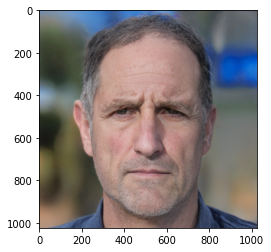

In [8]:
fnames = os.listdir('./out')
for fname in fnames:
  if fname.endswith('.png'):
    path_load = Path('./out') / fname 
    print(path_load)
    img = plt.imread(path_load)
    plt.figure()
    plt.imshow(img)